In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model=LinearRegression()
Xs = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(Xs,y,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
model.fit(x_train, y_train)

(150, 4)
(51, 4)
(150, 1)
(51, 1)


LinearRegression()

In [3]:
print("Slope: ",model.coef_)
print("Intercept: ",model.intercept_)

Slope:  [[ 52.88983391   2.98675773  95.24575895 -22.5337812 ]]
Intercept:  [-11192.28352859]


In [4]:
y_pred = model.predict(x_test)

In [5]:
def myfunc(hp,cw,es,hm):
  Y = model.intercept_ + model.coef_[0][0]*hp + model.coef_[0][1]*cw + model.coef_[0][2]*es + model.coef_[0][3]*hm;
  return Y
predictedprice = myfunc(120,40,150,30)
print("Predicted price is ", predictedprice)

Predicted price is  [8884.81725628]


In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
predictions = model.predict(x_test)
mae = mean_absolute_error(y_test,predictions)
print("Mean Absolute Error = ",mae)
mse = mean_squared_error(y_test,predictions)
print("Mean Squared Error = ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error = ",rmse)

Mean Absolute Error =  2654.537583066735
Mean Squared Error =  12478173.378990818
Root Mean Squared Error =  3532.4458069432317


In [9]:
model.score(Xs, y)

0.8067617253399086

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


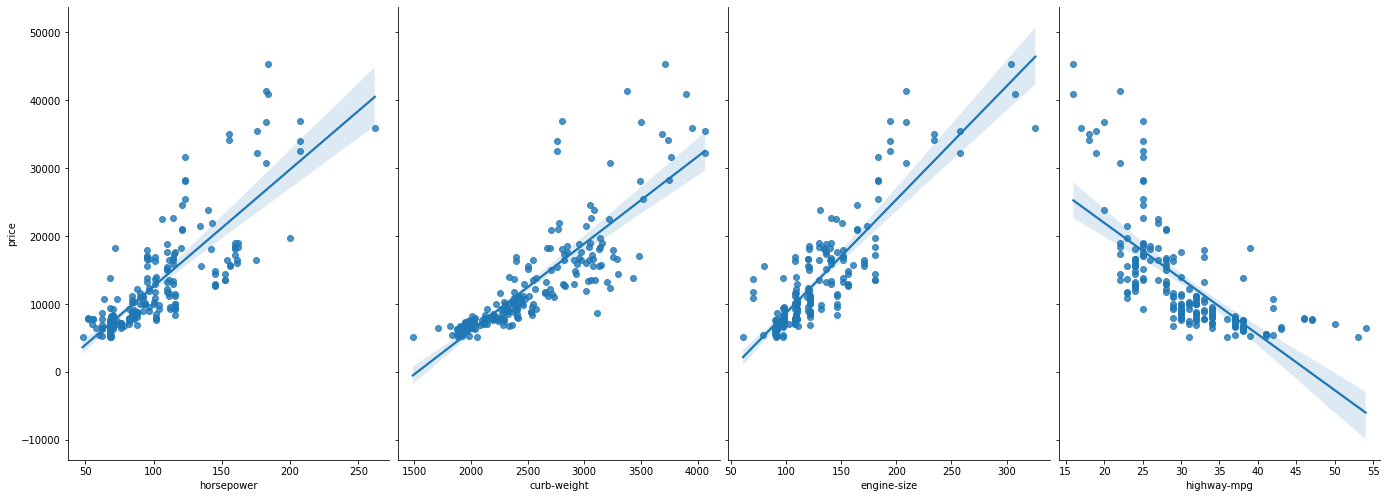

In [11]:
import seaborn as sns
%matplotlib inline

sns.pairplot(df, x_vars=['horsepower', 'curb-weight', 'engine-size', 'highway-mpg'], y_vars='price', size=7, aspect=0.7, kind='reg')